In [3]:
from sklearn.datasets import fetch_california_housing

In [5]:
ds = fetch_california_housing()
ds

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
import pandas as pd
import numpy as np

In [11]:
ds.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [13]:
df = pd.DataFrame(ds.data , columns = ds.feature_names)

In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
ds.target_names

['MedHouseVal']

In [21]:
y = pd.DataFrame(ds.target , columns = ds.target_names)

In [23]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [31]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.

    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `st

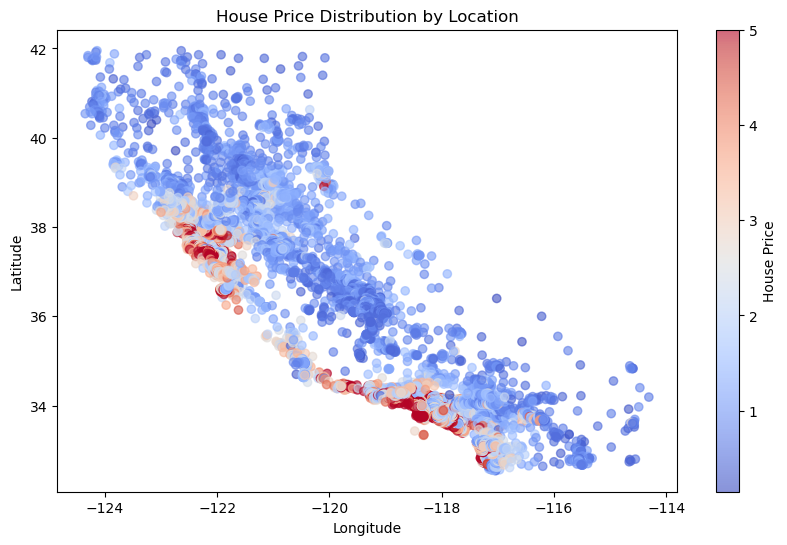

In [47]:

d = df.merge(y, left_index=True, right_index=True)

# Scatter plot of longitude vs latitude, colored by house price
plt.figure(figsize=(10, 6))
plt.scatter(d['Longitude'], d['Latitude'], c=d['MedHouseVal'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label="House Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Price Distribution by Location")
plt.show()


In [57]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df , y , test_size=0.3, random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trian = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [189]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
x_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
from sklearn.metrics import r2_score
print(r2_score(y_test , y_pred))

-1166.744736983933


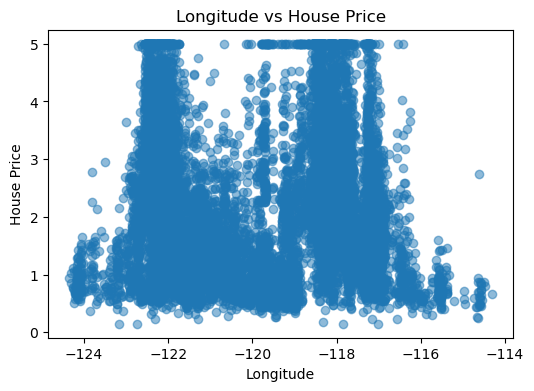

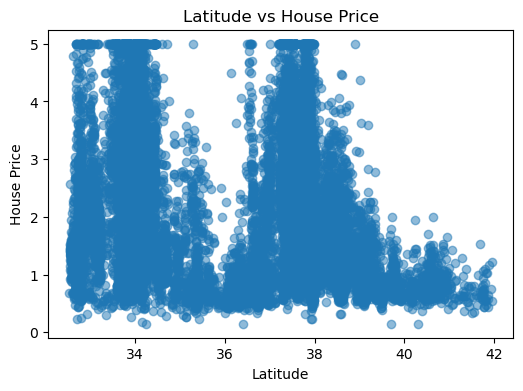

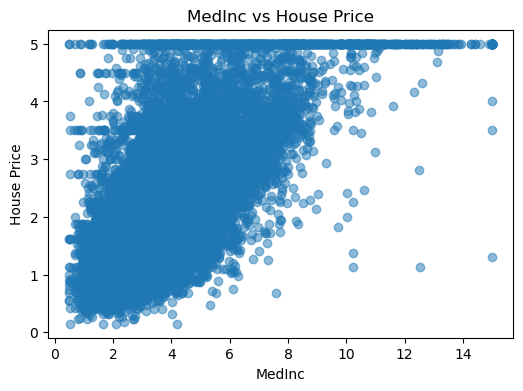

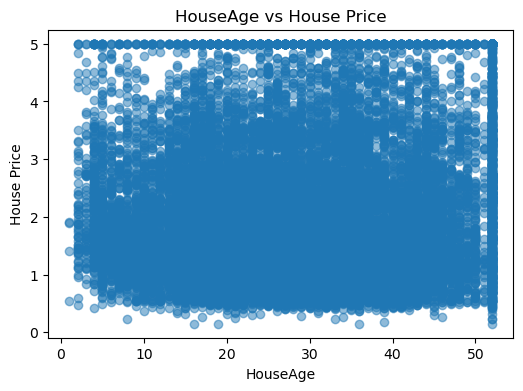

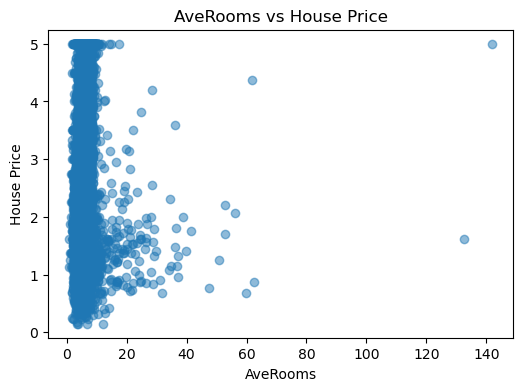

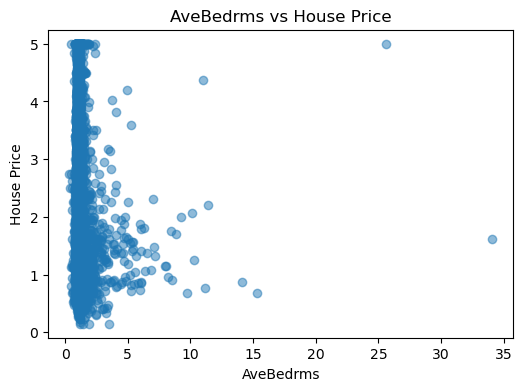

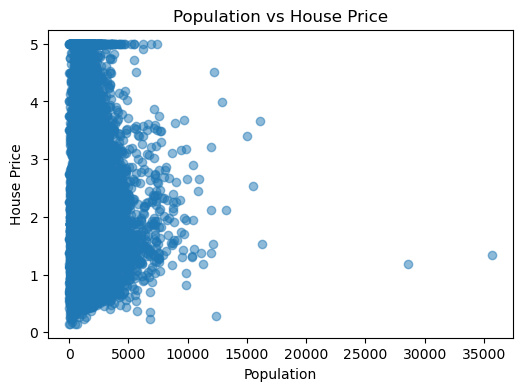

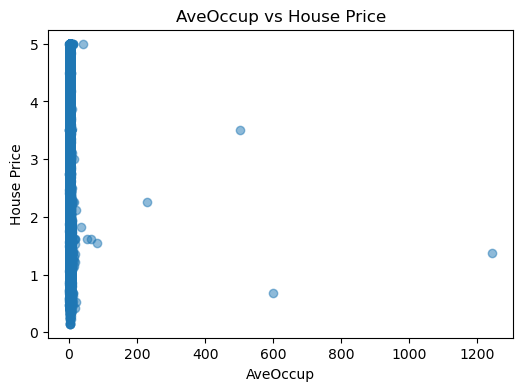

In [79]:
import matplotlib.pyplot as plt

features = ['Longitude', 'Latitude', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']  

for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], y['MedHouseVal'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("House Price")
    plt.title(f"{feature} vs House Price")
    plt.show()


In [91]:
df2 = df[['AveRooms', 'AveBedrms', 'Population', 'AveOccup']]

In [93]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df2 , y , test_size=0.3, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trian = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [99]:
from sklearn.metrics import r2_score
print(r2_score(y_test , y_pred))

-1.8059053384274661


(4.8, 5.0)

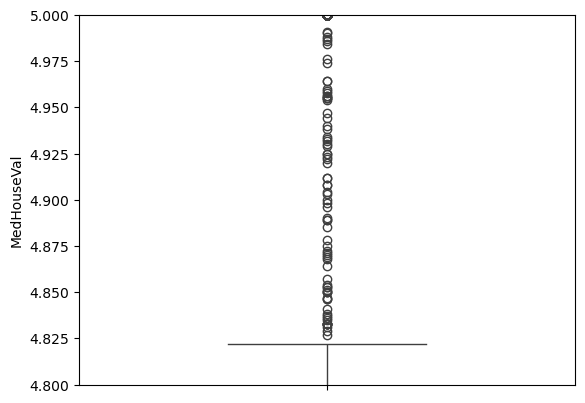

In [111]:
import seaborn as sns
sns.boxplot(y['MedHouseVal'])
plt.ylim(4.8,5)

In [113]:
y[y['MedHouseVal']>4.825]

,MedHouseVal
89,5.00001
140,4.83300
459,5.00001
489,4.89600
493,5.00001
...,...
20422,5.00001
20426,5.00001
20427,5.00001
20436,5.00001


In [117]:
Q1 = np.percentile(y, 25)  # 25th percentile
Q3 = np.percentile(y, 75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get boolean mask for outliers
outlier_mask = (y < lower_bound) | (y > upper_bound)

outlier_indices = np.where((y < lower_bound) | (y > upper_bound))[0]

In [157]:
df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)
y_cleaned = y.drop(index=outlier_indices).reset_index(drop=True)

In [159]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_cleaned , y_cleaned , test_size=0.3, random_state=42)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trian = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [135]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [181]:
from sklearn.metrics import r2_score
print(r2_score(y_test , xgb_model.predict(x_test)))

0.8221614360809326


In [191]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5)  # Tune depth
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
print(r2_score(y_test , y_pred))

0.5724112158402244


In [145]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R² Score: -0.7182962290083252


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [161]:
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5)
tree_model.fit(x_train, y_train)
print("Decision Tree R²:", r2_score(y_test, tree_model.predict(x_test)))

Decision Tree R²: 0.6823065838191906


In [186]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb_model.fit(x_train, y_train)
print("XGBoost R² Score:", r2_score(y_test, xgb_model.predict(x_test)))


XGBoost R² Score: 0.8221614360809326


In [193]:
y_test

,MedHouseVal
2676,0.552
12476,0.978
17093,2.453
15513,1.621
5332,1.631
...,...
9029,1.301
4203,1.583
12009,1.031
16326,2.281


In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best R² Score: ", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\Asus\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score:  0.8077126145362854


In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [7, 10, 15],
    'max_depth': [3, 5, 7, 10]
}

tree_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best R² Score: ", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 15}
Best R² Score:  0.6498441093358563
